### 교차 검증

In [53]:
# : 부족한 데이터셋 및 특정 데이터에 과적합되는 문제 해결을 위한 방안
# - 학습 데이터셋을 일정 크기의 데이터로 n개 분리 후 1/n은 검증용, 나머지는 학습용으로 사용
# - 엄청 오래 걸린다 (대용량 파일엔 하지 말 것)

In [54]:
# 1. Load Data
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 1, 0, 1])

In [55]:
# 2. KFold 생성 : 데이터를 두 개로 분할
kf = KFold(n_splits=2)

In [56]:
# 3. 데이터 분할
datasets = kf.split(X)     # geneator 타입이 출력

for train, test in datasets:
    print(train, test)

[2 3] [0 1]
[0 1] [2 3]


perchDF 파일 : 기본 5등분

In [57]:
import pandas as pd

perchDF = pd.read_csv("../../DATA/perch3.csv")
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [83]:
# perch : 기본 5 등분
fold_5 = KFold(n_splits=4)  # n_splits= : n 등분

datasets = fold_5.split(perchDF)

for index, (train, test) in enumerate(datasets):
    print(f"{index} => {train.shape}, {test.shape}")

# 2 x (28,) (28,)  얘는 정확히 같음
# 3 x (37,) (19,)
# 4 x (42,) (14,)
# 5 x (45,) (11,)
# TODO 왜 느는지 이해가 안됨
# 데이터 : 56 x 4
#

0 => (42,), (14,)
1 => (42,), (14,)
2 => (42,), (14,)
3 => (42,), (14,)


iris.csv 가져오기

In [59]:
irisDF = pd.read_csv("../../DATA/iris.csv")
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
# 똑같이 진행
# fold_5 = KFold(n_splits=5)

# ret_iris = fold_5.split(irisDF)

# for index, (train, test) in enumerate(ret_iris):
#     print(f"{index} => {train.shape}, {test.shape}")
    
def KFold_print(dataset, n_splits, suffle=True,  random_state=None, PRINT=True):
    kf = KFold(n_splits=n_splits, random_state=random_state)

    datasets = kf.split(dataset)
    for index, (train, test) in enumerate(datasets):
        if PRINT:
            print(f"{index} => {train.shape}, {test.shape}")
            print(dataset.iloc[train])
            print(dataset.iloc[test])
        
        
        
KFold_print(irisDF, 5)

0 => (120,), (30,)
     sepal_length  sepal_width  petal_length  petal_width    species
30            4.8          3.1           1.6          0.2     setosa
31            5.4          3.4           1.5          0.4     setosa
32            5.2          4.1           1.5          0.1     setosa
33            5.5          4.2           1.4          0.2     setosa
34            4.9          3.1           1.5          0.1     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[120 rows x 5 columns]
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa

In [73]:
# 품종 비율별 시각화하기
import matplotlib.pyplot as plt

def KFold_species_rate(dataset, n_splits, suffle=True,  random_state=None, PRINT=True):
    kf = KFold(n_splits=n_splits, random_state=random_state)

    datasets = kf.split(dataset)
    species_rates = []
    for index, (train, test) in enumerate(datasets):
        if PRINT:
            print(f"{index} => {train.shape}, {test.shape}")
            print(dataset.iloc[train])
            print(dataset.iloc[test])
        # 품종의 비율을 계산하고 수치화하기
        
    #     species_rate = dataset.iloc[train]["species"].value_counts(normalize=True).to_dict()
    #     species_rates.append(species_rate)
    
    # print(species_rates)

def draw_plot(data_list):
    # 품종의 비율을 시각화하기
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(data_list)), data_list)
    plt.show()
    
KFold_species_rate(irisDF, 5, PRINT=False)

In [74]:
# 2트
from sklearn.linear_model import LogisticRegression


def KFold_print(dataset, n_splits, suffle=True,  random_state=None, PRINT=True):
    kf = KFold(n_splits=n_splits, random_state=random_state)

    datasets = kf.split(dataset)
    
    train_list, test_list = [], []
    for index, (train, test) in enumerate(datasets):
        print(f'--------------- {index} ---------------------')
        # return index
        train_idx = train.tolist()
        test_idx = test.tolist()
        
        # 인덱스에 해당하는 데이터셋 추출
        trainDF = dataset.iloc[train_idx]
        testDF = dataset.iloc[test_idx]
        print('[TrainDF]')
        print(trainDF['species'].value_counts()/len(trainDF))
        print('[TestDF]')
        print(testDF['species'].value_counts()/len(testDF))
        
        X_train = trainDF.drop(columns=['species'])
        y_train = trainDF['species']

        X_test = testDF.drop(columns=['species'])
        y_test = testDF['species']
        
        # 분류 모델 학습
        log_model = LogisticRegression(max_iter=3000)
        log_model.fit(X_train, y_train)
        
        # Train and validate performance
        train_score_log = log_model.score(X_train, y_train)
        val_score_log = log_model.score(X_test, y_test)
        
        print(f"Train Score: {train_score_log}")
        print(f"Validation Score: {val_score_log}")
        
        train_list.append(train_score_log)
        test_list.append(val_score_log)
        
        
        
        if PRINT:
            print(f"{index} => {train.shape}, {test.shape}")
            print(dataset.iloc[train])
            print(dataset.iloc[test])
            
    return train_list, test_list

iris_kfold_1 = KFold_print(irisDF, 5, PRINT=False)
# ret = k_fold.split(irisDF[irisDF.columns[:-1]])

--------------- 0 ---------------------
[TrainDF]
species
versicolor    0.416667
virginica     0.416667
setosa        0.166667
Name: count, dtype: float64
[TestDF]
species
setosa    1.0
Name: count, dtype: float64
Train Score: 0.9666666666666667
Validation Score: 1.0
--------------- 1 ---------------------
[TrainDF]
species
virginica     0.416667
versicolor    0.333333
setosa        0.250000
Name: count, dtype: float64
[TestDF]
species
setosa        0.666667
versicolor    0.333333
Name: count, dtype: float64
Train Score: 0.9666666666666667
Validation Score: 1.0
--------------- 2 ---------------------
[TrainDF]
species
setosa        0.416667
virginica     0.416667
versicolor    0.166667
Name: count, dtype: float64
[TestDF]
species
versicolor    1.0
Name: count, dtype: float64
Train Score: 1.0
Validation Score: 0.8666666666666667
--------------- 3 ---------------------
[TrainDF]
species
setosa        0.416667
versicolor    0.333333
virginica     0.250000
Name: count, dtype: float64
[Test

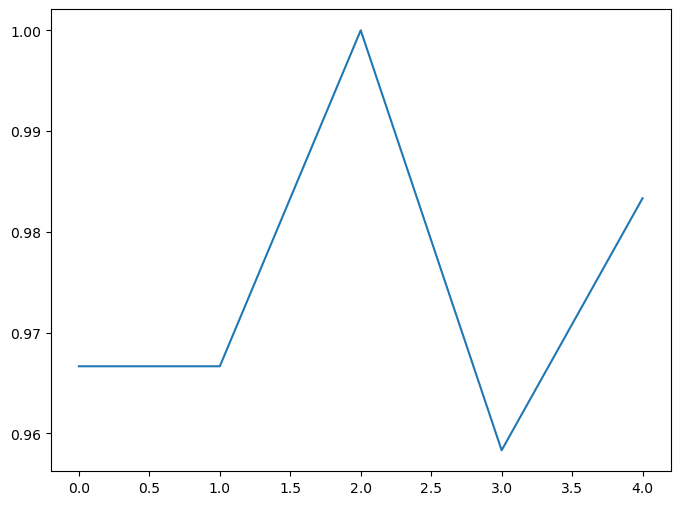

In [75]:
draw_plot(iris_kfold_1[0])

In [78]:
# 분류 모델 튜닝 : LogReg의 loss를 바꿔감

def KFold_print(dataset, n_splits, suffle=True,  random_state=None, PRINT=True):
    kf = KFold(n_splits=n_splits, random_state=random_state)

    datasets = kf.split(dataset)
    
    train_list, test_list = [], []
    for index, (train, test) in enumerate(datasets):
        print(f'--------------- {index} ---------------------')
        # return index
        train_idx = train.tolist()
        test_idx = test.tolist()
        
        # 인덱스에 해당하는 데이터셋 추출
        trainDF = dataset.iloc[train_idx]
        testDF = dataset.iloc[test_idx]
        print('[TrainDF]')
        print(trainDF['species'].value_counts()/len(trainDF))
        print('[TestDF]')
        print(testDF['species'].value_counts()/len(testDF))
        
        X_train = trainDF.drop(columns=['species'])
        y_train = trainDF['species']

        X_test = testDF.drop(columns=['species'])
        y_test = testDF['species']
        
        # 분류 모델 학습
        log_model = LogisticRegression(max_iter=3000)
        log_model.fit(X_train, y_train)
        
        # Train and validate performance
        train_score_log = log_model.score(X_train, y_train)
        val_score_log = log_model.score(X_test, y_test)
        
        print(f"Train Score: {train_score_log}")
        print(f"Validation Score: {val_score_log}")
        
        train_list.append(train_score_log)
        test_list.append(val_score_log)
        
# loss 변수로 만들고 for 돌리기

In [ ]:
# 
